In [1]:
import pandas as pd
import math # find nan with logic
import time
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
tic = time.time()

# Fixing the formatting of these wonderful people
    1. I had to install LibreOffice just to view the files...
    2. Unnamed 0 is the place where the exam takes place at. DONE
    3. Loop over Unnamed 0 if nan then put the previous DONE
    4. Delete the all NaN apart from location, as those are rows that just specify location. DONE
    5. Finally we will append, first just few columns then next which are female and finally the total, we will see later if we use those. DONE
    6. Check if we can convert data to numeric.
    7. LOOP OVER YEARS
    

In [3]:
seasons = [
    "2023-24",
    "2022-23",
    "2021-22",
    "2020-21",
    "2019-20",
    "2018-19",
    "2017-18",
    "2016-17",
    "2015-16",
    "2014-15",
    "2013-14",
    "2012-13",
    "2011-12",
    "2010-11",
    "2009-10",
    "2008-09",
    "2007-08"
]


In [4]:
#Initialize empty dataframe.
df = pd.DataFrame()

In [ ]:

for year in seasons:
    #Data has multiple sheets and is formatted horribly.
    
    df_yearly =    pd.read_excel('dvsa1203_v2.ods',engine='odf',sheet_name=year,skiprows=6)
    
    df_yearly = df_yearly.rename(columns={'Unnamed: 0':'Location', 'Unnamed: 1': "Age"})
    
    #THEY DO NOT HAVE THE AGE COLUMN IN EARLIER DATASETS JESUS.b

    name = df_yearly.iloc[0,0]
    
    #Put the true names into the file, nan is a float else it is integeer 
    for i in range(df_yearly.shape[0]):
        #If the location is of type float it means it is a missing value we replace it with the previous name.
        #If location is not a float it is a string, all posterior missing values will be that string, until next.
        if type(df_yearly.iloc[i,0])==float:
            
            df_yearly.iloc[i,0] = name
        else:
            name = df_yearly.iloc[i,0]
            
    
    look_na = df_yearly.columns.to_list()
    look_na.remove('Location')
    
    
    # Drop only the rows with only the name of the place and nothing else.
    df_yearly = df_yearly.dropna(how="all",subset=look_na)
    df_yearly = df_yearly.reset_index(drop=True)
    
    #REFORMAT DATA: keep only men and women not the aggregate.
    
    #Baseline, male
    # Use index name
    men = df_yearly.loc[:,["Location", "Age","Conducted","Passes","Pass rate (%)"]].copy()
    men.loc[:,'gender']=0

    #USE location because the name of the column is the same but the index is not as there are empty columns...
    # Females rename the columns
    women = df_yearly.loc[:,["Location", "Age","Conducted.1",	"Passes.1",	"Pass rate (%).1"]].copy().rename(
        columns={"Conducted.1":"Conducted","Passes.1":"Passes","Pass rate (%).1":"Pass rate (%)"}
    )
    women.loc[:,'gender']=1
    
    df_yearly = pd.concat([men,women],axis=0)
    df_yearly['year']=year
    
    df = pd.concat([df,df_yearly],axis=0)
    print(f"{year} completed succesfully")

2023-24 completed succesfully
2022-23 completed succesfully
2021-22 completed succesfully
2020-21 completed succesfully


In [ ]:
df

In [ ]:
df.to_csv("passing_rates.csv", index = False)

# Do not run all above, below should now be a different notebook.

In [ ]:
df = pd.read_csv("passing_rates.csv")

In [ ]:
df_reading = df[df['Location'].isin(['Wood Green (London)','Reading', 'Wood Green'])]

In [ ]:
# Remove the total for the age, found in some posterior datasets and reset the index.

df_reading = df_reading[df_reading['Age']!="Total"].reset_index(drop=True)

In [ ]:
# Convert all ages to int. Now it doesn't let me convert to that.

df_reading = df_reading.astype({"Age":float, "Conducted":float, "Passes":float , "Pass rate (%)":float})

In [ ]:
df_reading["Location"] = df_reading["Location"].apply(lambda row: "Wood Green (London)" if row=="Wood Green" else row)


In [ ]:
df_reading

In [ ]:
df_reading.to_csv("passing_rates_reading.csv")

# What do I want to see?
 - Change across age and gender.
 - Change across time series 

## Change across age and gender

    Males have significaly higher passing rates, but the location has a big shift for both females and males.
    Given that we have a sufficiently big sample we can already argue informally in favour of Reading.


<Axes: xlabel='Age', ylabel='Pass rate (%)'>

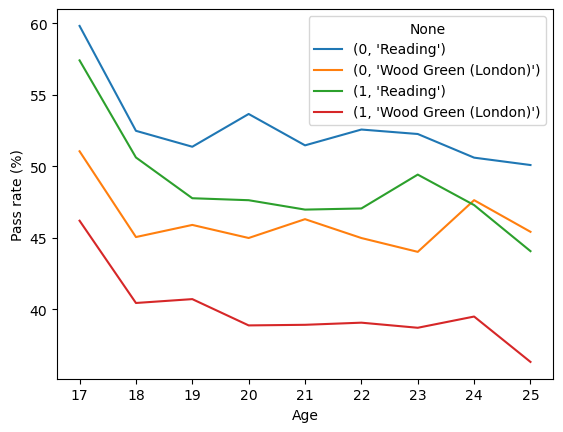

In [24]:
sns.lineplot(x= "Age", y="Pass rate (%)" ,hue=df_reading[['gender','Location']].apply(tuple,axis=1),data=df_reading, errorbar=None)

<Axes: xlabel='Age', ylabel='Pass rate (%)'>

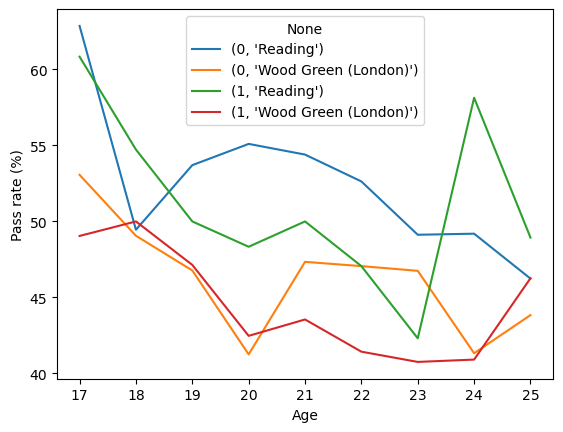

In [25]:
# Check this out year on year.
# Fix this plot a bit.
sns.lineplot(x= "Age", y="Pass rate (%)" ,hue=df_reading[['gender','Location']].apply(tuple,axis=1),data=df_reading[df_reading['year']=="2023-24"], errorbar=None)

## Change across time
- First, restrict myself to females of age 21
    There is some variability.

- We can argue that we can bunch females 19-22 together, this should reduce the variability. And the sample is sufficiently large.
 And repeat the analysis.
    
- Later, can try a bootstrap sample. Check out assumptions. Not so easy for non i.i.d data.

In [26]:
df_women_21 = df_reading[(df_reading["Age"]==21) & (df_reading["gender"]==1)]

In [27]:
df_women_21 = df_women_21.sort_values(by="year")

In [73]:
for city in df_women_21['Location'].unique().tolist():
    print(city)
    print(df_women_21[df_women_21['Location']==city].describe())

Wood Green (London)
        Age   Conducted      Passes  Pass rate (%)  gender
count  17.0   17.000000   17.000000      17.000000    17.0
mean   21.0  237.823529   92.588235      38.924394     1.0
std     0.0   60.542583   26.213210       3.502386     0.0
min    21.0   72.000000   31.000000      33.990148     1.0
25%    21.0  216.000000   76.000000      35.858586     1.0
50%    21.0  238.000000   99.000000      38.509317     1.0
75%    21.0  267.000000  107.000000      42.553191     1.0
max    21.0  317.000000  135.000000      43.835616     1.0
Reading
        Age   Conducted      Passes  Pass rate (%)  gender
count  17.0   17.000000   17.000000      17.000000    17.0
mean   21.0  205.588235   94.941176      46.982573     1.0
std     0.0   59.502163   25.175560       4.898995     0.0
min    21.0   56.000000   30.000000      36.815920     1.0
25%    21.0  190.000000   91.000000      44.194757     1.0
50%    21.0  214.000000  100.000000      46.411483     1.0
75%    21.0  245.000000  107

In [36]:
df_women_21[df_women_21['year']=="2023-24"]

,Unnamed: 0,Location,Age,Conducted,Passes,Pass rate (%),gender,year
31,3162,Wood Green (London),21.0,310.0,135.0,43.548387,1,2023-24
22,2483,Reading,21.0,98.0,49.0,50.000000,1,2023-24


<Axes: xlabel='year', ylabel='Pass rate (%)'>

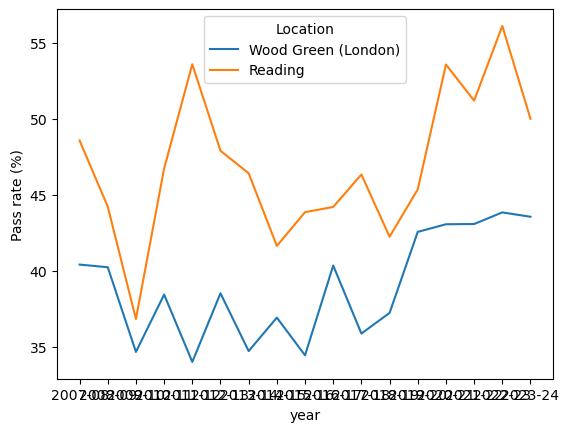

In [28]:
sns.lineplot(x= "year", y="Pass rate (%)" ,hue="Location",data=df_women_21, errorbar=None)

<Axes: xlabel='year', ylabel='Conducted'>

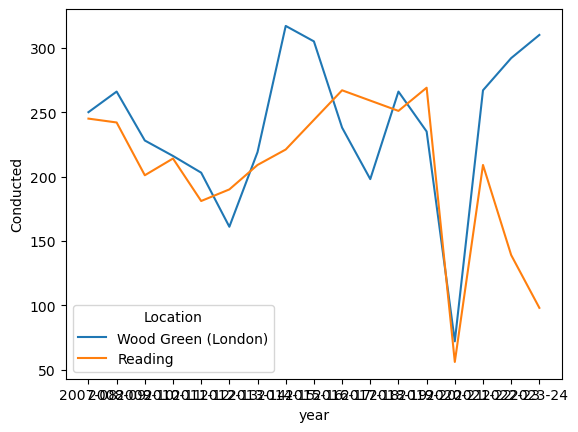

In [29]:
sns.lineplot(x= "year", y="Conducted" ,hue="Location",data=df_women_21)

### Here I bunch across ages, following reasoning on other notebook. I don't know if it is perfect.

In [96]:
df_reading_bunch_ages = df_reading.groupby(['gender','year','Location'],as_index=False).sum()

In [97]:
df_reading_bunch_ages['pass_rate'] = df_reading_bunch_ages['Passes']/df_reading_bunch_ages['Conducted']

In [99]:
df_reading_bunch_ages

,gender,year,Location,Age,Conducted,Passes,Pass rate (%),pass_rate
0,0,2007-08,Reading,189,4069,2077,437.768755,0.510445
1,0,2007-08,Wood Green (London),189,2035,863,382.685875,0.424079
2,0,2008-09,Reading,189,3832,2129,485.126397,0.555585
3,0,2008-09,Wood Green (London),189,1921,892,419.477579,0.464341
4,0,2009-10,Reading,189,3477,1951,487.959765,0.561116
...,...,...,...,...,...,...,...,...
63,1,2021-22,Wood Green (London),189,1828,824,408.426161,0.450766
64,1,2022-23,Reading,189,2405,1446,518.686842,0.601247
65,1,2022-23,Wood Green (London),189,2237,1016,414.737628,0.454180
66,1,2023-24,Reading,189,1352,717,460.346708,0.530325


<Axes: xlabel='year', ylabel='pass_rate'>

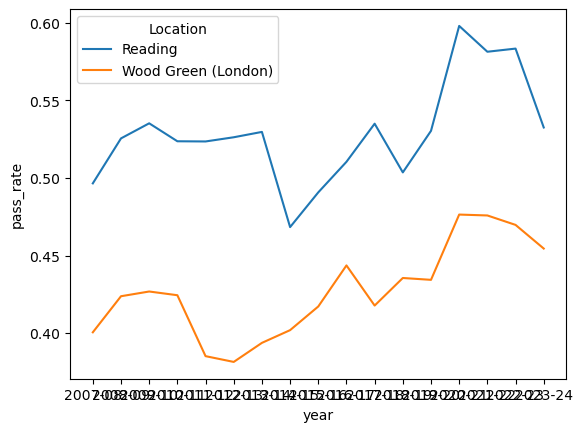

In [100]:
sns.lineplot(x= "year", y="pass_rate" ,hue="Location",data=df_reading_bunch_ages, errorbar=None)